<Figure size 1200x600 with 0 Axes>

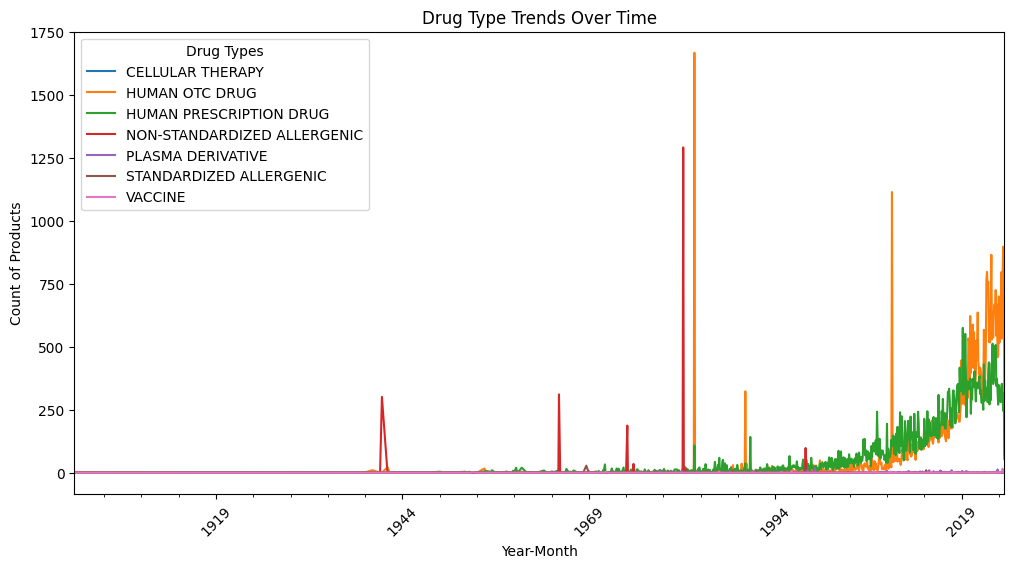

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np


product_df['STARTMARKETINGDATE'] = pd.to_datetime(product_df['STARTMARKETINGDATE'], errors='coerce')


product_df['YearMonth'] = product_df['STARTMARKETINGDATE'].dt.to_period('M')


monthly_sales = product_df.groupby(['YearMonth', 'PRODUCTTYPENAME']).size().reset_index(name='count')


monthly_sales_pivot = monthly_sales.pivot(index='YearMonth', columns='PRODUCTTYPENAME', values='count')


monthly_sales_pivot.fillna(0, inplace=True)

plt.figure(figsize=(12,6))
monthly_sales_pivot.plot(kind='line', figsize=(12,6))
plt.title('Drug Type Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.legend(title='Drug Types')
plt.show()

